# Hello, Seaborn
With this I aim to take my data visualization to the next level with seaborn. Cheers to making faster, more attractive plots.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
from sklearn.preprocessing import LabelEncoder

### Reading data
pd.read_csv is used to read the data with 3 parameters:
- filepath: ```"tip.csv"``` where the file is stored
- ```index_col="Date"```: When we load the dataset, we want each entry in the first column to denote a different row. Todo this we set the value og index_col to the name of the first column
- ```parse_dates=True```: This tells the notebook to inderstand the each row label as a date

In [2]:
data= pd.read_csv('tip.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Plotting a histogram
Histograms are useful for cisualizing the distribution of a dataset. It can be done using ```distplot()``` function

C:\Users\poude\AppData\Local\Temp\ipykernel_9448\3735552591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["total_bill"])


<Axes: xlabel='total_bill', ylabel='Density'>

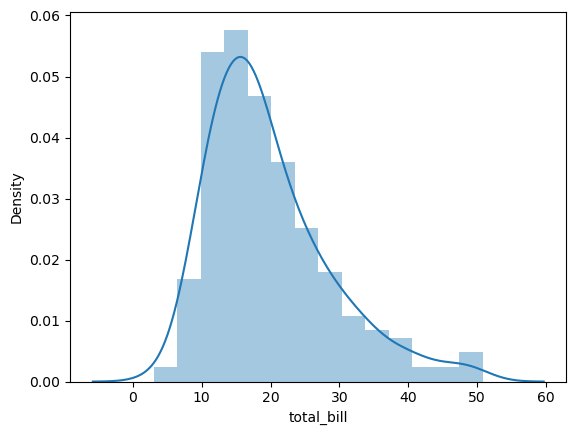

In [4]:
sns.distplot(data["total_bill"])

### Plotting a kernal density estimate
KDEs are a way to estimate the probablity density function of a random variable. It is done using ```kdeplot()``` function.

<Axes: xlabel='total_bill', ylabel='Density'>

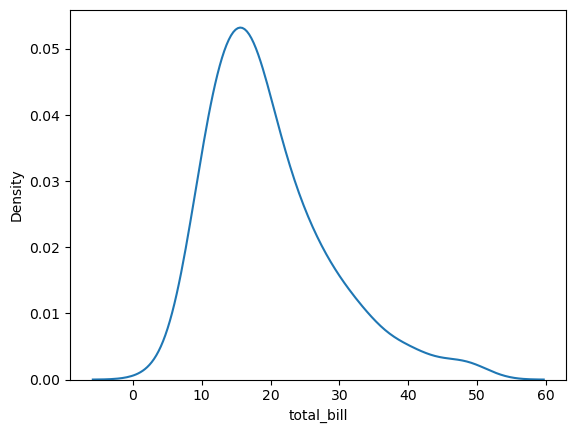

In [5]:
sns.kdeplot(data['total_bill'])

### Plotting a scatter plot
Scatter plots are useful for visualizing the relationship between two variable. It is done using ```scatterplot()``` function

<Axes: xlabel='total_bill', ylabel='tip'>

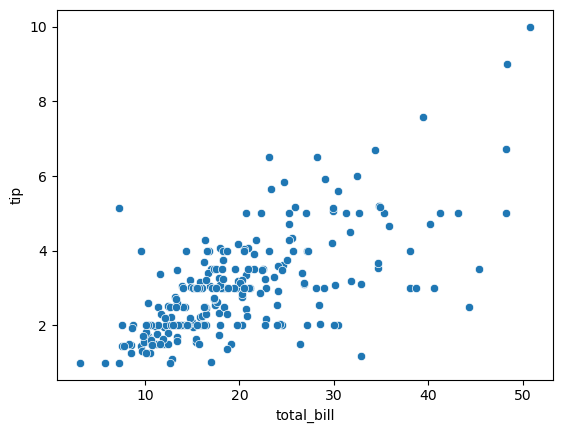

In [6]:
sns.scatterplot(x="total_bill", y="tip", data=data)

In [7]:
# Encoding categorical features
le = LabelEncoder()

le.fit(data.sex.drop_duplicates())
data.sex= le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker= le.transform(data.smoker)

### Plotting a line plot
Line plots are useful for visualizing trends over time or other continuous variable. It is done using ```lineplot()```

<Axes: xlabel='day', ylabel='tip'>

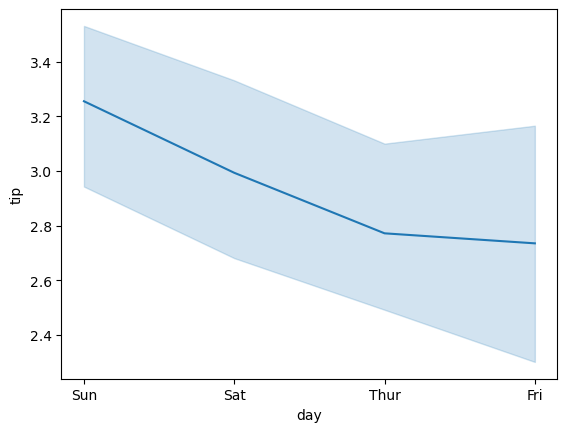

In [8]:
sns.lineplot(x="day", y='tip', data=data)

### Plotting a bar plot
Barplots are useful for visualizing categorical variables. It is done using ```countplot()```

<Axes: xlabel='time', ylabel='count'>

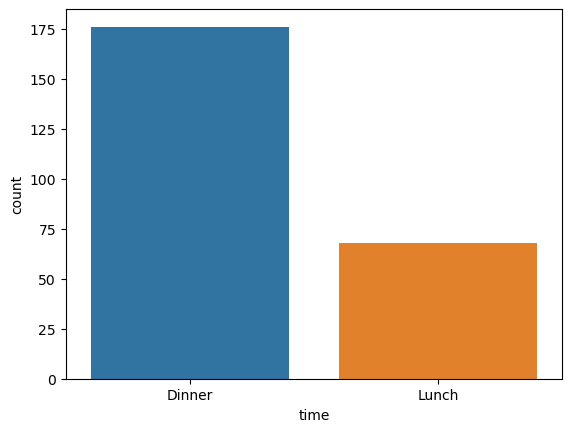

In [9]:
sns.countplot(x='time',data=data)

#### Plotting a heat map
Heat maps are useful for visualizing the relationships between two categorical variables. It can be done using ```heatmap()```

In [10]:
data.describe()

,total_bill,tip,sex,smoker,size
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.951100
min,3.070000,1.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000


<Axes: >

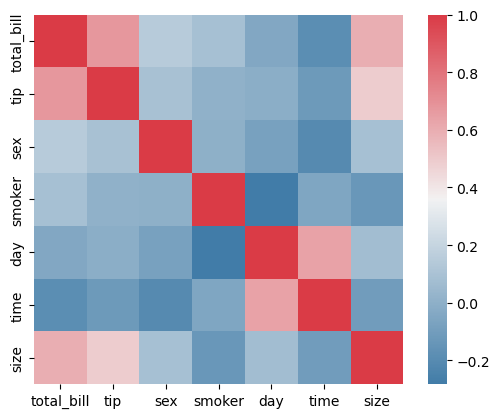

In [23]:
le.fit(data.day.drop_duplicates())
data.day= le.transform(data.day)

le.fit(data.time.drop_duplicates())
data.time= le.transform(data.time)

data.corr()['tip'].sort_values()

corr= data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),square=True)